# Reducing the dataset in variable size

### requires that pandas_profiling modul is installed

#### 1.  Importing the dataset df9 from part 1 (before multiindex was set, should be equivalent to                         "process_data_df10.csv)

In [80]:
import os
os.getcwd()

'/home/elron/Dataanalytics/Project/Data'

In [81]:
import pandas as pd
import os

#df = pd.read_pickle('process_data_df9_before_multiindex.pkl') 
df = pd.read_csv("process_data_df10.csv", header=[0,1], na_values=['nan'],
sep=',',low_memory=False)

# Spalte ohne Information löschen
df.drop(['Unnamed: 0_level_0'],axis=1, inplace = True)
df = df.droplevel(level=0,axis=1)

df = df.dropna(subset = ['qc_serien_nummer']).drop_duplicates(subset = ['qc_serien_nummer'])#.set_index('qc_serien_nummer')
df

,ps,ps_datum,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_dicke_as_micro_m,ps_dicke_1,ps_dicke_2,ps_dicke_3,ps_dicke_4,...,p_product_size,p_effective_area_per_leaf_m2,p_effective_pressure_bar,qc_flux_l/m2/h,qc_a-value_l/m2/h/bar,qc_b-value_m/s_10-6,qc_flux_m3/m2/day,sum_of_scrap,roll_position,p_Product_type_group
0,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,40.286235,4.625285,3.678446,0.966870,0.0,58.181818,Low Energy
1,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,40.252401,4.621401,3.165247,0.966058,0.0,116.363636,Low Energy
2,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,39.718186,4.560067,3.170593,0.953236,0.0,174.545455,Low Energy
3,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,39.441426,4.528292,2.855092,0.946594,0.0,232.727273,Low Energy
4,cb031d4b18ff,2018-05-13,4487.0,31.0,250.0,136.0,136.0,134.0,134.0,135.0,...,8,1.4646,8.71,39.731817,4.561632,2.810373,0.953564,0.0,290.909091,Low Energy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,36.149091,4.150297,3.606951,0.867578,0.0,0.000000,Low Energy
118683,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,35.645870,4.092522,3.266436,0.855501,0.0,0.000000,Low Energy
118684,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,34.888194,4.005533,3.464832,0.837317,0.0,0.000000,Low Energy
118685,3fa606fdd9e8,2018-05-14,2202.0,31.0,250.0,137.0,135.0,133.0,133.0,132.0,...,8,1.4646,8.71,37.721778,4.330859,3.255691,0.905323,0.0,0.000000,Low Energy


#### 2. remove all richtwert and ref columns into seperate dataframe

In [82]:
df1 = df.copy()
result = pd.concat([df1.filter(regex = '_ref'), df1.filter(regex = '_richtwert_')], axis = 1, sort = False)
result1 = result.loc[:,~result.columns.duplicated()]
#result1 = result1.join(identdf)
#result1.to_pickle('Richtwert_ref_variables_dataset.pkl')
df1.drop(result1, axis = 1, inplace = True)

#### 3. make mean column and drop the columns the mean is made from

In [83]:
df2 = df1.copy()

# Multiple Measurment columns
meanList = ['pa_cm-pda','pa_chlorkonzentration','pa_air-knife_vor_amin_bad','airknife_vor_amin_trockner',
            'pa_amin-trockner_feuchtigkeit_danfugt_bs','pa_amin-trockner_feuchtigkeit_danfugt_as','pa_amin-trockner_feuchtigkeit_cofely',
            'ps_dicke','ps_bad_temperatur','ps_auftragswerk_feuchtigkeit','sc_d_links_werte','sc_d_rechts_werte']


# Funktion to drop multiple measurment values
def MeanColumnCreate(meanList, df):
  for i in meanList:
      filterdf = df.filter(regex = i)
      name = i+"_mean"
      df[name] = filterdf.iloc[:].mean(axis = 1)
      df.drop(filterdf, axis = 1, inplace = True)

In [84]:
MeanColumnCreate(meanList, df2)
df2.to_pickle('process_data_mean_columns_added')

#### 4. remove all median columns 

In [85]:
df3 = df2.copy()
df3.drop(df3.filter(regex = 'median'), axis = 1, inplace = True)

#### 5. remove all datetimes columns 

In [86]:
df4 = df3.copy()
dfdate = df4.select_dtypes(include = ['datetime64']).join(df4[['reaction_end','reaction_start']])
df4.drop(dfdate, axis = 1, inplace = True)

#### 6. remove all columns with the keyword datum

In [87]:
df5 = df4.copy()
df5.drop(df5.filter(regex = 'datum'), axis = 1, inplace = True)

#### 7. drop of certain columns, for detail see comments

In [88]:
dropList = ['qc_maximalersalzrueckhalt','qc_breite','sc_d_links_anz_max','sc_d_rechts_anz_min',
            'sc_d_rechts_anz_max','qc_barcode_leak_test_values', 'ps','pa_coating','nr','pa_mpda_lsg','pa_chlorlsg','pa_sbs_lsg',
            'pa_alkalilsg','p_product_size','p_effective_area_per_leaf_m2','p_product_type', 'pa_beschichtete_rollenlange_m','pp_actual_product',
           'pp_actual_product_short_name','pp_plan_ausbeute_elemente', 'pp_plan_product', 'pp_product_short_name',
           'qc_p_position','roll_position','winding_product_short_name','winding_product_type','assembled_in_elements_m', 'winding_product_line']

df6 = df5.copy()
for i in dropList:
    df6.drop(i, axis = 1, inplace = True)
# qc_maximalersalzruckhalt : just two values 0 and 99.99 
# qc_breite : just two values 985 and 0
# sc_d_links_anz_max : because has 118639 zero values (0.04 % are not zero)
# sc_d_rechts_anz_min : has 118674 (> 99.9%) zeros
# sc_d_rechts_anz_max  : has 118528 (99.9%) zeros
# qc_barcode_leak_test : categorical variable not fully understood
# ps : categorical variable not fully understood
# pa_coating : dummy variable
# nr : not necessary for linear regression
# all ending with lsg : seems to be container numbers for the reaction solution, no details are known about these containers
# p_product_size [1.4646, 1.3914, 0] is a recoding of p_effective_area_per_leaf_m2 [8, 4, 0]
# p_product_full_name : categorical variable, which contains same information as p_product_type
# p_product_type : renamed with more clear name aka B400 ULP, therefore dropped
# all pp_ : are subsets of categorical variables of p_product
# qc_p_position','roll_position','winding_product_short_name','winding_product_type' all categorical variable

In [91]:
#df6 = df6.reset_index()
#df6 = df6.drop(['Unnamed: 0_level_0'],axis=1)
#df6.drop('index', axis = 1, inplace = True)
df6
#df6.drop('level_0', axis = 1, inplace = True)

,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_out_m,ps_scrap_%,pa_bahn-geschwindigkeit_m/min,pa_bad-wechsel_m-pda,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
0,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,False,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
1,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,False,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
2,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,False,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
3,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,False,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
4,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,False,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118682,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,True,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118683,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,True,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118684,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,True,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
118685,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,True,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0


#### 7. Normierung with script from frank, but without the columns salzrckhalt_abs, rel etc

In [92]:
df6 = df6.set_index('p_product_full_name')

In [93]:
df6 = df6.select_dtypes(include=['float64', 'int'])

In [94]:
df6 = df6.reset_index()

In [95]:
df6

,p_product_full_name,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_out_m,ps_scrap_%,pa_bahn-geschwindigkeit_m/min,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
0,b3ccc5e5f9b5,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
1,b3ccc5e5f9b5,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
2,b3ccc5e5f9b5,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
3,b3ccc5e5f9b5,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
4,b3ccc5e5f9b5,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,9.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117857,b3ccc5e5f9b5,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
117858,b3ccc5e5f9b5,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
117859,b3ccc5e5f9b5,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
117860,b3ccc5e5f9b5,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,9.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0


#### Normierung

In [96]:
# Liste mit allem Produktnamen 
# -> dient als Filter für Iteration
produktnamen=['a79cf6a73839','c807697b3c7e','f22a7fef71c5','c13b2f69d3c1','3e94b7067349','3394d82edc97','df9e75b29918','316c8d1ffca1','5661014763c8','73928f2577b5','22227b31350f','df1d09e643af','e2b1e6e1d5f5','54b98d0fe2eb','ff16223eb2bf','0cc0ba87b12f','a640f68db89c','b3ccc5e5f9b5','2256f65c362b','33d21930e431','3a0c28c7fc8c','630448a85ca3']

In [97]:
# Erzeugen eines leeren DataFrames, in welches die normierten Werte eingetragen werden
df_norm=pd.DataFrame()

for i in range(len(produktnamen)):
    
    # 1.Filtern nach Produktname und Erzeugen eines DataFrames, in welchem die Normierung erfolgt
    # !! Index ändert sich !!
    to_norm=df6['p_product_full_name']==produktnamen[i]
    df_n=df6[to_norm]
    
    # 2. Merken von Größen, welche nicht normieret werden können (product_name) oder es bereits sind (relative Werte)
    # !! Gleicher Index für diese Größen für df_n und df_n2 
    #  -> können später problemlos wieder angefügt werden
    df_n2=df_n.copy()
    df_n=df_n.drop(columns=['p_product_full_name'])
    
    # Wahl der Normierungsmethode
    df_n=(df_n-df_n.min())/(df_n.max()-df_n.min())
    #df_n=(df_n-df_n.mean())/df_n.std()
    
    # Anfügen der Größen, welche nicht normiert werden sollen
    # sowie sukzessives Einfügen der normierten DataFrames in das leere DataFrame df_norm
    df_n['p_product_full_name']=df_n2['p_product_full_name']
    #df_n['soll_salzr_rel']=df_n2['soll_salzr_rel']
    #df_n['soll_permeatd_rel']=df_n2['soll_permeatd_rel']
    df_n.set_index('p_product_full_name')
    df_norm=df_norm.append(df_n, ignore_index=True)

In [99]:
df_norm['p_product_full_name']

0         a79cf6a73839
1         a79cf6a73839
2         a79cf6a73839
3         a79cf6a73839
4         a79cf6a73839
              ...     
117857    630448a85ca3
117858    630448a85ca3
117859    630448a85ca3
117860    630448a85ca3
117861    630448a85ca3
Name: p_product_full_name, Length: 117862, dtype: object

In [100]:
df_norm2=df_norm.copy()

In [101]:
df_norm2=df_norm2.set_index('p_product_full_name')

In [102]:
df_norm2.head()

,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_out_m,ps_scrap_%,pa_bahn-geschwindigkeit_m/min,pa_raum_temperatur_start_c,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
p_product_full_name,,,,,,,,,,,,,,,,,,,,,
a79cf6a73839,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,1.0,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
a79cf6a73839,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,1.0,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
a79cf6a73839,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,1.0,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
a79cf6a73839,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,1.0,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
a79cf6a73839,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,1.0,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN


In [103]:
# Filtert man das DataFrame nach den verschiedenen Produktname, treten Konstanten Spalten auf (z.B. ps_c_losung_wt_%)
# -> Annahme: Es handelt sich dabei um spezifische Vorgaben für die Produktion eines jeweiligen Produktes (weil sie eben nicht über im kompletten DataFrame konstant sind)
# -> Erzeugen NaN-Einträge, da beim Normieren durch 0 geteilt wird (df_n.max()=df_n.min())
#  -> Müssen Entfernt werden, da uns Schwankungen einzelner Prozessgrößen innerhalb eines Produktes interessieren

df_norm3=df_norm2.dropna(axis='columns', how='any')

In [104]:
df_norm3.head()

,ps_beschichtete_rollenlange_m,ps_out_m,ps_scrap_%,pa_raum_temperatur_start_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_raum_feuchte_start_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_ndecan/tmc,...,qc_flux_m3/m2/day,pa_cm-pda_mean,pa_chlorkonzentration_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean
p_product_full_name,,,,,,,,,,,,,,,,,,,,,
a79cf6a73839,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.506699,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
a79cf6a73839,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.519579,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
a79cf6a73839,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.568144,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
a79cf6a73839,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.548385,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
a79cf6a73839,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.563722,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [75]:
df_norm4 = df_norm3.copy()
df_norm4=df_norm4.sort_index()
df_norm4.head()

,ps_beschichtete_rollenlange_m,ps_out_m,ps_scrap_%,pa_raum_temperatur_start_c,pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,pa_raum_feuchte_start_%,pa_vertikale_feuchte_oben_start_%,pa_vertikale_feuchte_oben_mitte_%,pa_ndecan/tmc,...,qc_flux_m3/m2/day,pa_cm-pda_mean,pa_chlorkonzentration_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean
p_product_full_name,,,,,,,,,,,,,,,,,,,,,
0cc0ba87b12f,0.987424,0.987424,0.012736,1.0,0.700608,0.000000,0.173913,0.210526,0.45,0.000000,...,0.371509,0.656913,0.891689,0.628571,0.816,0.891667,0.955904,0.660099,0.890031,0.449153
0cc0ba87b12f,0.965308,0.965308,0.035134,1.0,0.956687,0.313305,0.000000,0.000000,0.00,0.306766,...,0.395541,0.963424,0.077477,0.428571,0.272,0.325000,0.811720,0.290640,0.675231,0.601695
0cc0ba87b12f,0.965308,0.965308,0.035134,1.0,0.956687,0.313305,0.000000,0.000000,0.00,0.306766,...,0.398763,0.963424,0.077477,0.428571,0.272,0.325000,0.811720,0.290640,0.675231,0.601695
0cc0ba87b12f,0.965308,0.965308,0.035134,1.0,0.956687,0.313305,0.000000,0.000000,0.00,0.306766,...,0.399865,0.963424,0.077477,0.428571,0.272,0.325000,0.811720,0.290640,0.675231,0.601695
0cc0ba87b12f,0.973981,0.973981,0.026350,1.0,0.797872,0.304721,0.086957,0.105263,0.45,0.001854,...,0.347483,0.584492,1.000000,0.657143,0.696,0.858333,0.925152,0.152709,0.753340,0.648305


In [105]:
df_norm4 = df_norm4.reset_index()

In [106]:
prod_appearance=df_norm4['p_product_full_name'].tolist()
prod_appearance_if_cond=prod_appearance.copy() # Vergleichsbedingung; ursprüngliche List wird überschrieben werden

In [107]:
# Durchnummerieren der einzelnen Produkte
for i in range(len(prod_appearance)):
    if i==0:
        j=1
        prod_appearance[i]=prod_appearance[i][:4]+"_"+str(j)
    elif prod_appearance_if_cond[i]==prod_appearance_if_cond[i-1]:
        j=j+1
        prod_appearance[i]=prod_appearance[i][:4]+"_"+str(j)
    else:
        j=1
        prod_appearance[i]=prod_appearance[i][:4]+"_"+str(j)

In [108]:
df_norm5=df_norm4.drop(columns=['p_product_full_name'])

In [42]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import csv
df5

,ps,ps_beschichtete_rollenlange_m,ps_c_losung_wt_%,ps_gap_micro_m,ps_raum_temperatur_start_c,ps_auftragsbank_temperatur_start_c,ps_raum-feuchtigkeit_start_%,ps_out_m,ps_scrap_%,pa_beschichtete_rollenlange_m,...,pa_air-knife_vor_amin_bad_mean,airknife_vor_amin_trockner_mean,pa_amin-trockner_feuchtigkeit_danfugt_bs_mean,pa_amin-trockner_feuchtigkeit_danfugt_as_mean,pa_amin-trockner_feuchtigkeit_cofely_mean,ps_dicke_mean,ps_bad_temperatur_mean,ps_auftragswerk_feuchtigkeit_mean,sc_d_links_werte_mean,sc_d_rechts_werte_mean
qc_serien_nummer,,,,,,,,,,,,,,,,,,,,,
6f5dd5e75de0,cb031d4b18ff,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,4480.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
e83198853aa3,cb031d4b18ff,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,4480.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
0c6c47811c04,cb031d4b18ff,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,4480.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
6b51542380df,cb031d4b18ff,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,4480.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
58df9ba0a603,cb031d4b18ff,4487.0,31.0,250.0,24.0,19.0,57.0,4487.0,2.456522,4480.0,...,80.0,40.00,57.0,56.0,79.8500,134.785714,21.688889,75.625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55315e14346a,3fa606fdd9e8,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,1715.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
5e840146da5b,3fa606fdd9e8,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,1715.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0
05ac5c0533e3,3fa606fdd9e8,2202.0,31.0,250.0,24.0,19.0,46.0,2202.0,4.260870,1715.0,...,40.0,18.75,35.8,34.4,39.7875,133.571429,12.300000,27.625,0.0,0.0


In [109]:
#mergings=linkage(df_norm_dendro, method='complete')
df_norm5_t = df_norm5.transpose()

In [110]:
df_norm5_t

,0,1,2,3,4,5,6,7,8,9,...,117852,117853,117854,117855,117856,117857,117858,117859,117860,117861
index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,117852.000000,117853.000000,117854.000000,117855.000000,117856.000000,117857.000000,117858.000000,117859.000000,117860.000000,117861.000000
ps_beschichtete_rollenlange_m,0.987424,0.965308,0.965308,0.965308,0.973981,0.973981,0.973981,0.973981,0.973981,0.973981,...,0.992511,0.992511,0.992511,0.992511,0.992511,0.992511,0.992511,0.992511,0.992511,0.986784
ps_out_m,0.987424,0.965308,0.965308,0.965308,0.973981,0.973981,0.973981,0.973981,0.973981,0.973981,...,0.990634,0.990634,0.990634,0.990634,0.990634,0.990634,0.990634,0.990634,0.990634,0.983471
ps_scrap_%,0.012736,0.035134,0.035134,0.035134,0.026350,0.026350,0.026350,0.026350,0.026350,0.026350,...,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.051064
pa_raum_temperatur_start_c,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.250000
pa_temperatur_n-decan-lsg_chem_vorbereitung_start_c,0.700608,0.956687,0.956687,0.956687,0.797872,0.797872,0.797872,0.797872,0.797872,0.797872,...,0.801562,0.801562,0.801562,0.801562,0.801562,0.801562,0.801562,0.801562,0.801562,0.848437
pa_temperatur_alkali-lsg_chem_vorbereitung_start_c,0.000000,0.313305,0.313305,0.313305,0.304721,0.304721,0.304721,0.304721,0.304721,0.304721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.924298
pa_raum_feuchte_start_%,0.173913,0.000000,0.000000,0.000000,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pa_vertikale_feuchte_oben_start_%,0.210526,0.000000,0.000000,0.000000,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,...,0.358974,0.358974,0.358974,0.358974,0.358974,0.358974,0.358974,0.358974,0.358974,0.000000
pa_vertikale_feuchte_oben_mitte_%,0.450000,0.000000,0.000000,0.000000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,...,0.291667,0.291667,0.291667,0.291667,0.291667,0.291667,0.291667,0.291667,0.291667,0.166667


In [111]:
c_dist = pdist(df_norm5_t)

In [112]:
c_link = linkage(df_norm5_t, metric = 'correlation', method = 'complete')

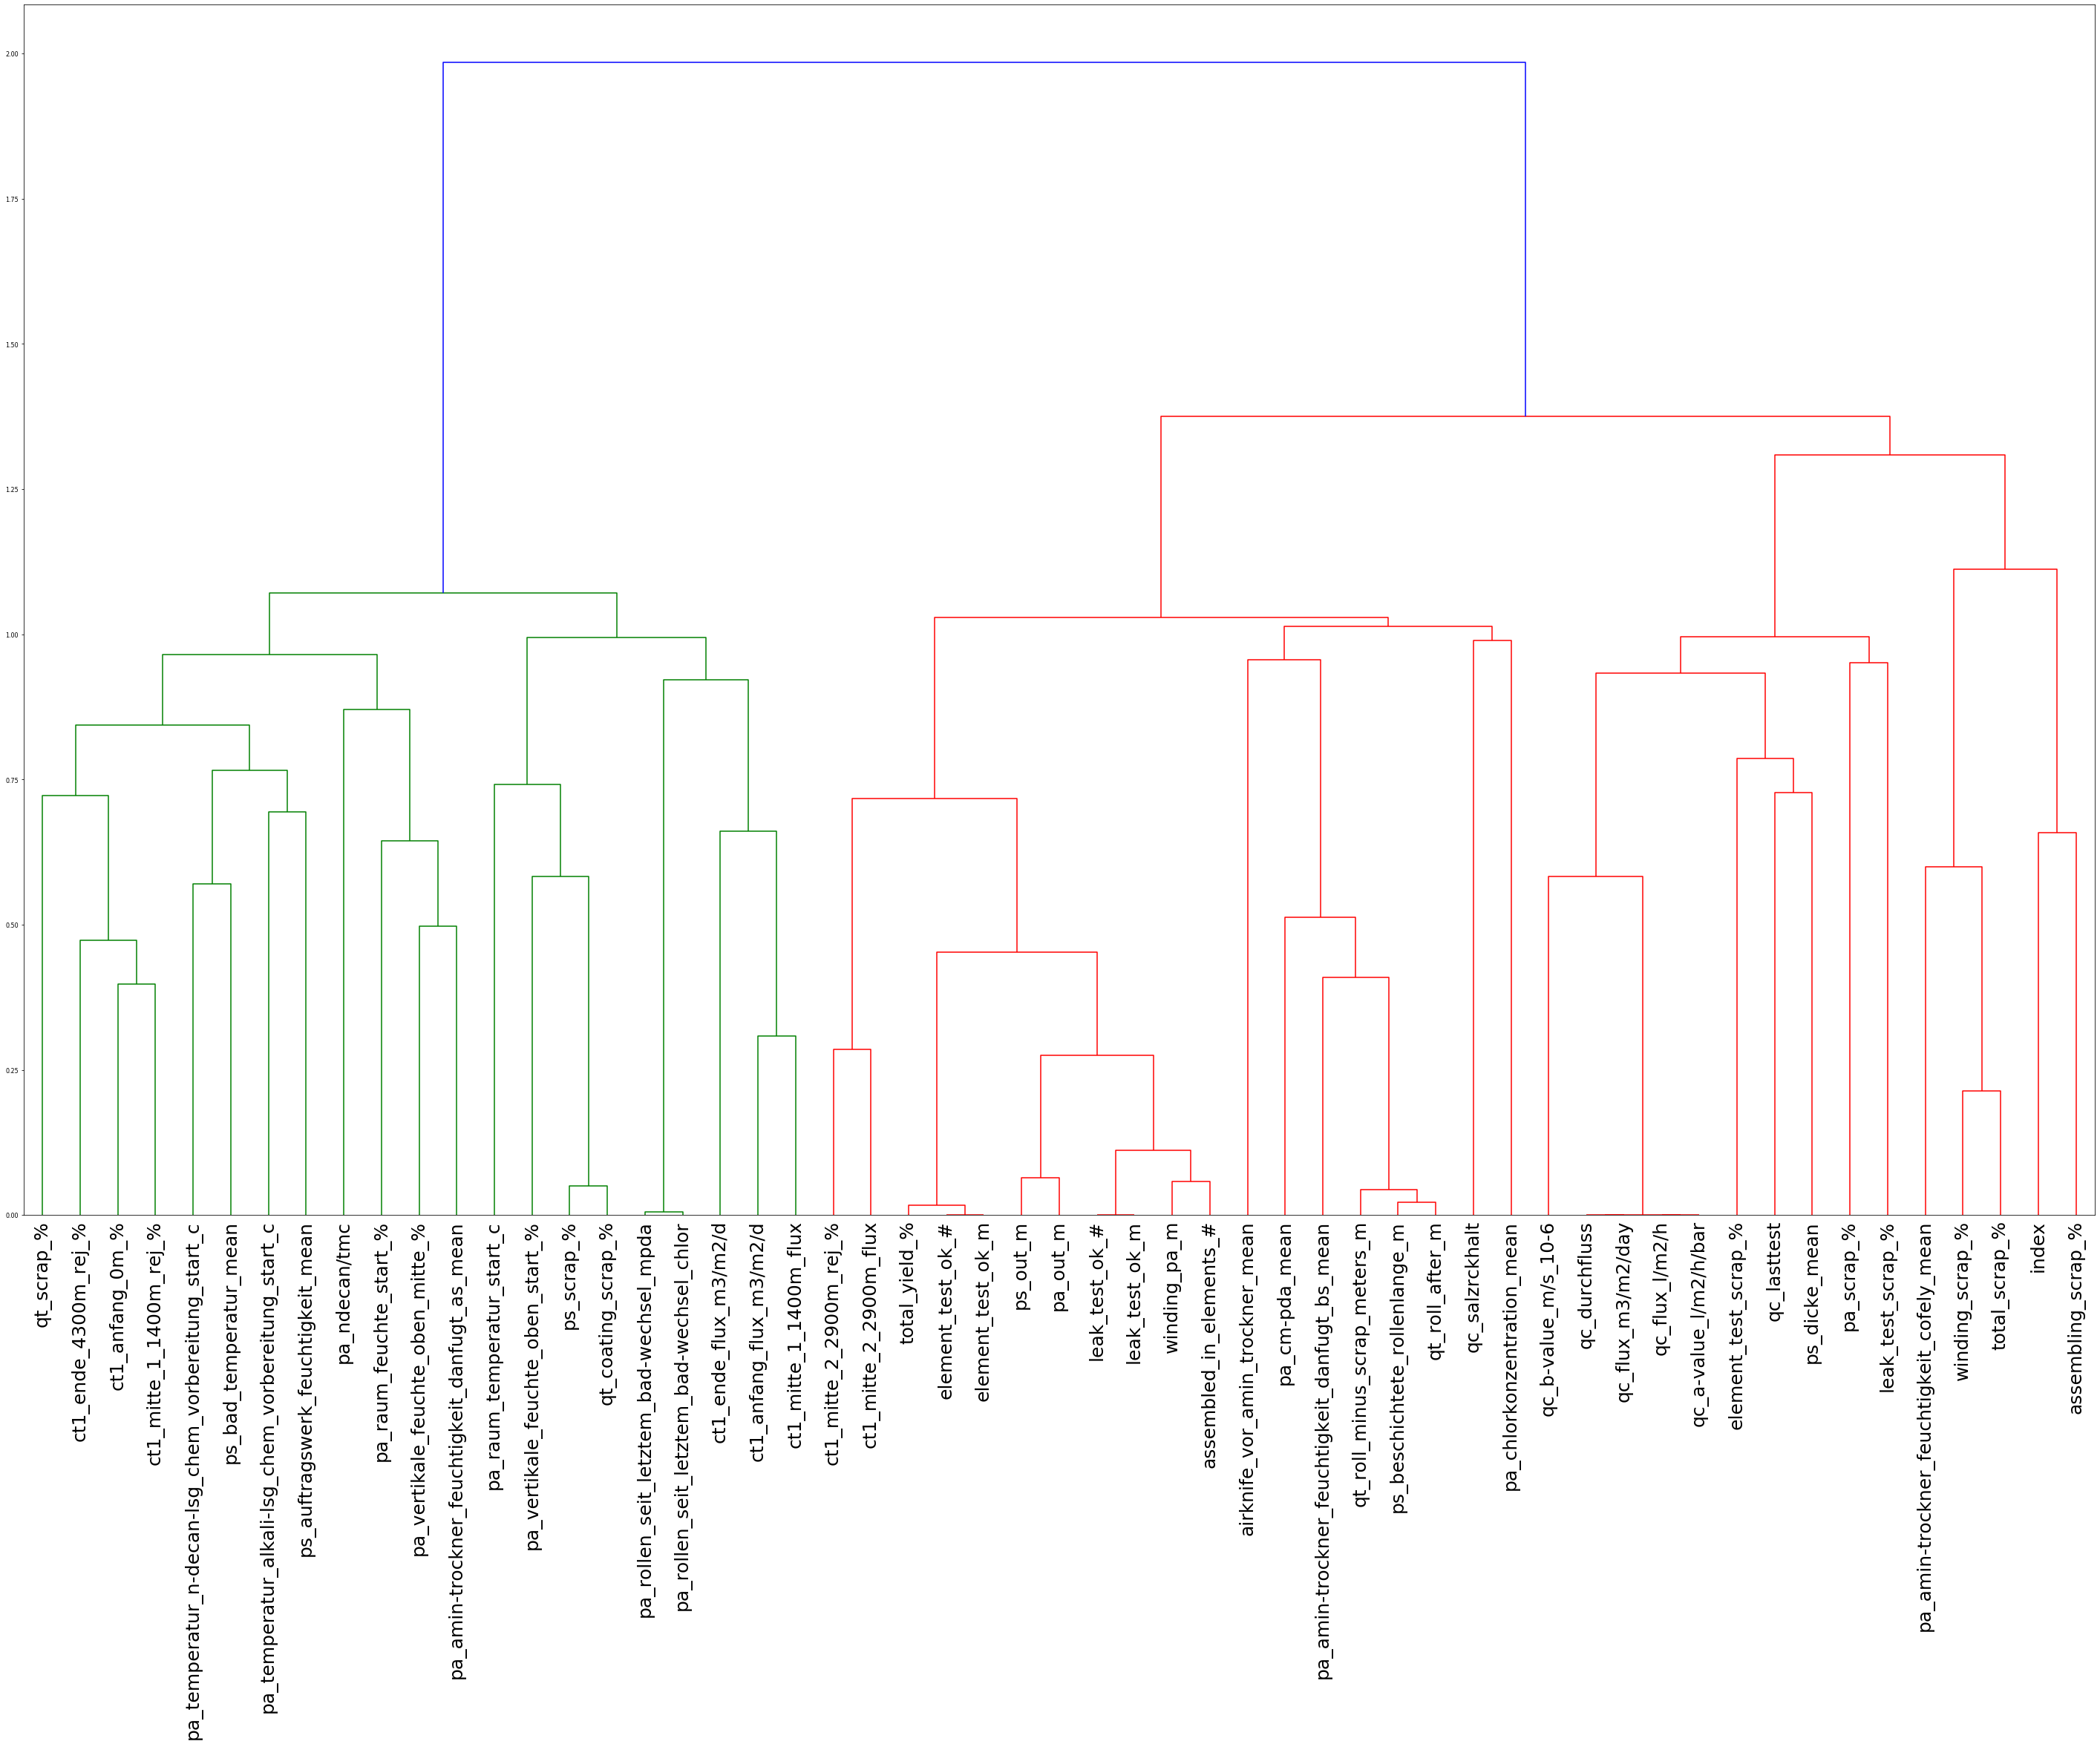

In [116]:
plt.figure(figsize=(50,30))
B = dendrogram(c_link, labels = list(df_norm5.columns))
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=25)
ax.tick_params(axis='y', which='major', labelsize=8)

Top Absolute Correlations
pp_scrap_last_core_m        winding_scrap_last_m         1.000000
qc_faktorkonzentration      qc_nachkommasalzrueckhalt    1.000000
                            qc_ph                        1.000000
qc_ph                       qc_nachkommasalzrueckhalt    1.000000
pp_scrap_first_outer_dia_m  winding_scrap_first_m        1.000000
                                                           ...   
winding_product_size        assembled_in_elements_#      0.956217
leak_test_ok_#              total_yield_%                0.955673
winding_product_size        leak_test_ok_#               0.954622
assembled_in_elements_#     qc_lagen                     0.954280
winding_number_of_leaves    assembled_in_elements_#      0.953747
Length: 145, dtype: float64


#### 8. determine highly correlated variables with pandas_profiling

In [117]:
import pandas_profiling
df7 = df6.copy()
#profile = df7.profile_report(title='Pandas Profiling Report : Profile_Report_of_df7')
#profile.to_file(output_file = 'Pandas Profiling Report : Profile_Report_of_df7.html')
#listCorrelated = profile.get_rejected_variables()